In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from collections import OrderedDict

def accuracy(output, target):
  ct = 0
  for i in range(len(target)):
    temp = output[i].argmax()
    if temp == target[i]:
      ct += 1
  return float(ct) * 100 / len(target)


# Load and preprocess the data
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
     transforms.RandomCrop(32, padding=4),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

# Define the model, loss function and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
acc_train = []
# Train the model
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    acc_train.append(accuracy(outputs, labels))
    print(acc_train[-1])

print('Finished Training')

# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Files already downloaded and verified
Files already downloaded and verified
37.5
62.5
56.25
62.5
62.5
56.25
62.5
62.5
75.0
50.0
Finished Training


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from collections import OrderedDict

def accuracy(output, target):
  ct = 0
  for i in range(len(target)):
    temp = output[i].argmax()
    if temp == target[i]:
      ct += 1
  return float(ct) * 100 / len(target)

# Load and preprocess the data
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
     transforms.RandomCrop(32, padding=4),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
newTrainSet , newutrainSet = torch.utils.data.random_split(trainset, [0.5, 0.5], generator=torch.Generator().manual_seed(423))
trainloader = torch.utils.data.DataLoader(newTrainSet, batch_size=20,
                                          shuffle=True, num_workers=2)
u_trainloader = torch.utils.data.DataLoader(newutrainSet, batch_size=1,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=20,
                                         shuffle=False, num_workers=2)

# Define the model, loss function and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
acc_train = []
unl_acc = []
# Train the model
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    acc_train.append(accuracy(outputs, labels))
    pseudo_labels = []
    pseudo_data = []
    for _, (input, label) in enumerate(u_trainloader):
        output = net(input)
        # print(output)
        predicted = output.argmax()
        # print(predicted)
        max_probs = output[0][predicted]
        for i in range(len(data)):
            if max_probs > 0.75:
                pseudo_label = predicted
                pseudo_labels.append(predicted)
                pseudo_data.append(input[0])
    if len(pseudo_data) > 0:
        pseudo_data = torch.stack(pseudo_data, dim=0)
        optimizer.zero_grad()
        output = net(pseudo_data)
        pseudo_labels = torch.tensor(pseudo_labels)
        loss = criterion(output, pseudo_labels)
        loss.backward()
        optimizer.step()

    print(acc_train[-1])

print('Finished Training')

# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100.0 * correct / total))


Files already downloaded and verified
Files already downloaded and verified
45.0
45.0
60.0
55.0
65.0
60.0
80.0
75.0
55.0
80.0
Finished Training
Accuracy of the network on the 10000 test images: 66 %


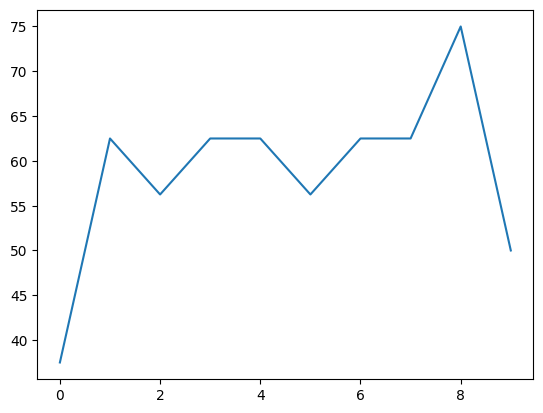

In [ ]:
import matplotlib.pyplot as plt
plt.plot(acc_train)
plt.show()

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %f %%' % (
    100.0 * correct / total))


Accuracy of the network on the 10000 test images: 67.740000 %


In [ ]:
pseudo_labels = []
pseudo_data = []
for _, (input, label) in enumerate(u_trainloader):
        print(label)
        output = net(input)
        # print(output)
        predicted = output.argmax()
        # print(predicted)
        max_probs = output[0][predicted]
        for i in range(len(data)):
            if max_probs > 0.75:
                pseudo_label = predicted
                pseudo_labels.append(predicted)
                pseudo_data.append(input[0])
print(pseudo_labels)
pseudo_datas = torch.stack(pseudo_data, dim=0)
pseudo_labels = torch.tensor(pseudo_labels)
print(pseudo_labels.shape)

tensor([1])
tensor([2])
tensor([6])
tensor([4])
tensor([0])
tensor([0])
tensor([8])
tensor([4])
tensor([9])
tensor([3])
tensor([7])
tensor([1])
tensor([3])
tensor([0])
tensor([6])
tensor([4])
tensor([0])
tensor([2])
tensor([9])
tensor([4])
tensor([0])
tensor([5])
tensor([4])
tensor([0])
tensor([1])
tensor([8])
tensor([9])
tensor([6])
tensor([2])
tensor([2])
tensor([1])
tensor([9])
tensor([4])
tensor([1])
tensor([1])
tensor([2])
tensor([9])
tensor([1])
tensor([2])
tensor([1])
tensor([9])
tensor([8])
tensor([0])
tensor([3])
tensor([6])
tensor([7])
tensor([7])
tensor([6])
tensor([8])
tensor([9])
tensor([2])
tensor([9])
tensor([7])
tensor([7])
tensor([8])
tensor([0])
tensor([7])
tensor([3])
tensor([1])
tensor([5])
tensor([9])
tensor([7])
tensor([2])
tensor([3])
tensor([9])
tensor([3])
tensor([2])
tensor([3])
tensor([4])
tensor([6])
tensor([6])
tensor([3])
tensor([3])
tensor([2])
tensor([9])
tensor([8])
tensor([7])
tensor([5])
tensor([9])
tensor([5])
tensor([5])
tensor([8])
tensor([7])
tens

KeyboardInterrupt: ignored

In [ ]:
print(pseudo_datas.shape)
print(torch.tensor(pseudo_labels))

torch.Size([29756, 3, 32, 32])
tensor([2, 2, 7,  ..., 3, 2, 2])


<ipython-input-34-3da1fe5a2a4d>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.tensor(pseudo_labels))
